<div class="alert alert-warning">

**Source Material**:

The following exercises are adapted from Chapter 7 of [Mark Newman's book, "Computational Physics"](http://www-personal.umich.edu/~mejn/cp/)

</div>


# Exercises: Basics of DFTs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Tuple, Sequence

%matplotlib notebook

(1.4.1) Write a function that performs a discrete Fourier transform on a *real-valued* signal containing $N$ samples: $(y_n)_{n=0}^{N-1} \rightarrow  (c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$

This should produce identical results to `numpy.fft.rfft`.

- Note: You should *not* try to write this in a fully-vectorized way. 
You should use for-loops and append to a list of Fourier coefficients. At the end of your function, simply convert this list of coefficients
to a numpy array and return the array.
- Note: only NumPy's exponential function (`np.exp`) can be passed complex numbers. `math.exp` only works with real-valued numbers
- Recall: Python uses `1j` to represent the imaginary number $i$. So, e.g., $e^{2\pi i}$ is computed as `np.exp(2 * np.pi * 1j)`

In [30]:
def py_dft(samples: Sequence[float]) -> np.ndarray:
    """Performs a Discrete Fourier Transform (type-1) for 
    real-valued data.
        
    Parameters
    ----------
    samples : Sequence[float]
        N evenly-spaced, real-valued numbers

    Returns
    -------
    numpy.ndarray, shape-(N//2 + 1,)
        The N//2 + 1 complex-valued Fourier coefficients describing `samples`
    
    Notes
    -----
    We want to compute c_k for each k in 0, 1, ..., N//2
    
    Recall that each c_k value is a sum over n of y_n * e ^ (-2 pi i * k * n/ N)
    where y_n is a sample at index n and N is the total number of samples.
    
    It is recommended that you perform this calculation by using two for-loops.
    """

    # STUDENT CODE HERE
    fourierCoefficients = []
    N = len(samples)
    for k in range(N//2 + 1):
        c_kvalue = 0
        for n in range(N):
            c_kvalue += samples[n] * np.exp(-2 * np.pi * 1j * k/N * n)
        fourierCoefficients.append(c_kvalue)
    return np.array(fourierCoefficients)

Let's test `py_dft` by checking that it produces the same results as `np.fft.rfft`.

In [32]:
# Use `np.arange` to create an array of 0, 1, ..., 9
samples = np.arange(9)#

# Use `py_dft` to compute the Fourier coeffs for `samples`
your_fourier_coeffs = py_dft(samples)#

# Use `np.fft.rfft` to compute the Fourier coeffs for `samples`
numpy_fourier_coeffs = np.fft.rfft(samples)#

print("Mine: ", your_fourier_coeffs)

print("Numpys: ", numpy_fourier_coeffs)

# If this raises an error, print out `your_fourier_coeffs` and
# `numpy_fourier_coeffs` and see how they differ
assert np.allclose(your_fourier_coeffs, numpy_fourier_coeffs)

Mine:  [36.  +0.j         -4.5+12.36364839j -4.5 +5.36289117j -4.5 +2.59807621j
 -4.5 +0.79347141j]
Numpys:  [36.  +0.j         -4.5+12.36364839j -4.5 +5.36289117j -4.5 +2.59807621j
 -4.5 +0.79347141j]


Consider the sine wave with frequency $f$

\begin{equation}
g(t) = \sin(2 \pi f t)
\end{equation}

Let's assume that $f = \frac{1}{150}\;\mathrm{Hz}$ (recall: $\mathrm{Hz}=\frac{1}{\mathrm{seconds}}$).
Thus the period of the wave is $T_{\text{period}} = 1/f = 150$ seconds.

(1.4.2) Using Euler's formula, $e^{ix} = \cos{x} + i\sin{x}$, write this sine wave in terms of complex-valued exponentials (i.e. using $e^{ix}$).
Notice that this represents a very simple Fourier series, one in which only a single frequency is present.

> 1.4.2 Solution: *SOLUTION HERE*

(1.4.3) Take $N=100$ samples of this sine wave over four complete periods of oscillation.
That is, create an array of $t_{n} = \frac{n}{N}T$ for $n = 0, 1, ... N-1$, where the duration is $T = 4T_{\text{period}}$, and create a corresponding array of $y_{n} = f(t_{n})$ .

In [41]:
f = 1/150 # frequency (Hz)
T = 150 # duration of sample (seconds)
N = 100 # number of samples
t_samples = np.arange(N) * T/N # the sample locations, in seconds
y_samples = [] # the samples of the sine wave
formula = 1j * 2 * np.pi * f
for t in t_samples:
    y_samples.append((1/(2 * 1j)) * np.exp(formula * t) + (-1/(2 * 1j)) * np.exp(-formula * t))
y_samples = np.array(y_samples)

Now plot the sampled signal, $y_{n}$, based on the following code.

```python
fig, ax = plt.subplots()
ax.plot(t_samples, y_samples, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")
```

<IPython.core.display.Javascript object>


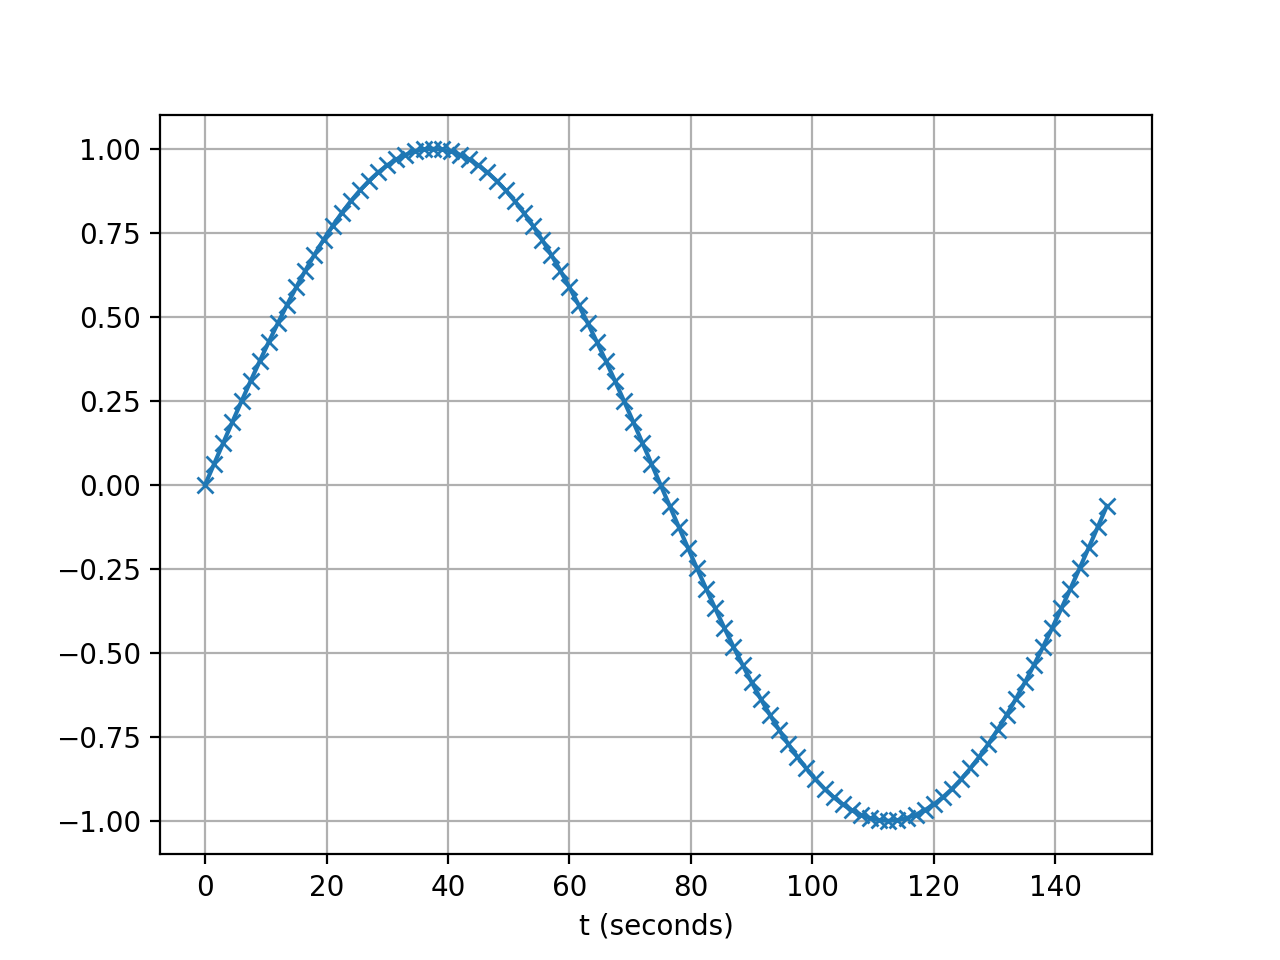

Text(0.5, 0, 't (seconds)')

In [42]:
# STUDENT CODE HERE
fig, ax = plt.subplots()
ax.plot(t_samples, y_samples, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")

(1.4.4) Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$.
How many Fourier-coefficients will be produced?
Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results as your DFT;
you can use the function `numpy.allclose` to compare your array of coefficients with those produced by `np.fft.rfft`.

In [43]:

complex_coeffs = py_dft(y_samples)

print(len(complex_coeffs) == N // 2 + 1)
print(np.allclose(complex_coeffs, np.fft.rfft(y_samples)))

True
True


/opt/anaconda3/envs/week1/lib/python3.8/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


(1.4.5) Recall that $k$ takes on integer values $0, 1, ..., \big\lfloor\frac{N}{2}\big\rfloor$.
Convert each $k$ value into frequency, $\nu_{k}$, with units of Hz.
These should be stored in a numpy array called `freqs`.

Similarly, $n$ takes on integer values: $0, 1, ..., N - 1$.
Convert $n$ into time, $t_{n}$, with units of seconds.
These should be stored in an array called `times`.

Being able to do convert $n$ to $t$ (time) and $k$ to $\nu_{k}$ (frequency) is very important.
We will use this throughout the rest of the module. Please be sure to chat with a neighbor or a TA to check your understanding. 

> 1.4.5 Solution: *SOLUTION HERE*

In [50]:
# STUDENT CODE HERE
n = np.arange(0, N)
k = np.arange(0, N//2 + 1)
times = n * (T/N)
freqs = k / T

(1.4.6) What should the plot of $|a_{k}|$ vs $\nu_{k}$ (the "Fourier spectrum"), look like? Recall that we are working with samples from $g(t) = \sin(2 \pi f t)$, with $f = \frac{1}{150}\;\mathrm{Hz}$.

- How many peaks should there be in the spectrum? (Consider: how many pure-tone sinusoids is needed to represent $g(t)$, and what are their frequencies?)
- At what value(s) of $\nu_{k}$ should the peak(s) reside?

> 1.4.6 Solution: *SOLUTION HERE*


We can use the following function to convert the complex-valued Fourier coefficients $(c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$ to the corresponding real-values Fourier amplitudes $(|a_k|)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$ and phase shifts $(\varphi'_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$.
Study the signature docstring, and body of the following function

In [51]:
def fourier_complex_to_real(
    complex_coeffs: np.ndarray, N: int
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts complex-valued Fourier coefficients (of 
    real-valued data) to the associated amplitudes and 
    phase-shifts of the real-valued sinusoids
    
    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...
    
    N : int
        The number of samples that the DFT was performed on.
    
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases

Now, using $(c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$, compute $(|a_k|)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$ and $(\varphi'_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$.
Plot the Fourier spectrum $|a_{k}|$ vs $\nu_{k}$, along with a vertical line where you predict the peak to occur. Use the following pseudocode to help you with your plot:

```python

# Convert `complex_coeffs` to real-valued amplitudes and phases
amps, phases = ???

fig, ax = plt.subplots()

# compute "by hand"
expected_peak_freq = ???

# plots Fourier spectrum
ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)

# plots a vertical line at the frequency corresponding to our sine wave
ax.vlines(expected_peak_freq, 0, 1.0, lw=5, alpha=0.5, ls="--", color="black")

# make the plot look nice
ax.set_xlim(0, 0.03)
ax.grid(True)
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)");
```

<IPython.core.display.Javascript object>


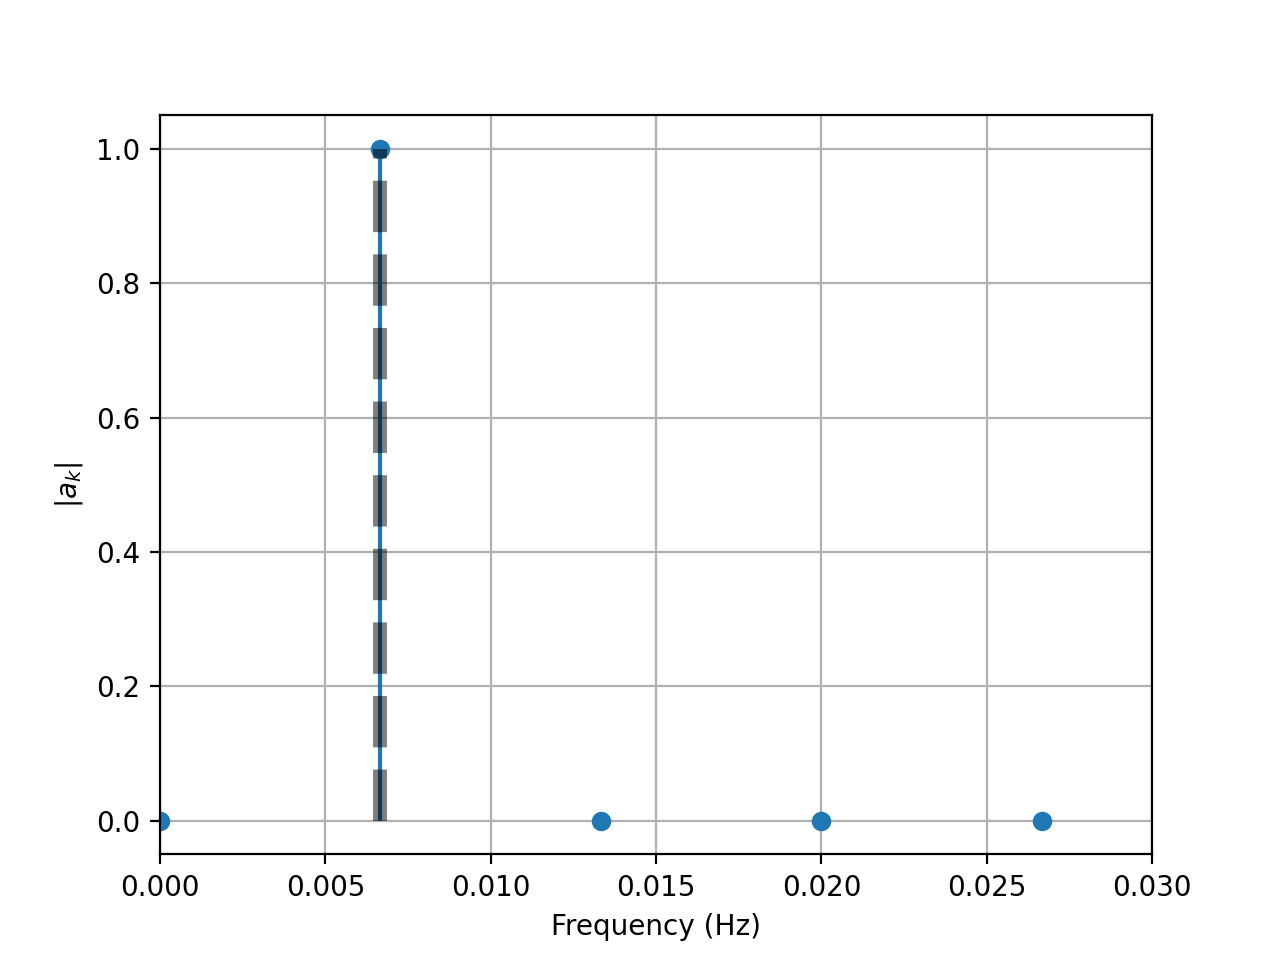

In [59]:
# STUDENT CODE HERE
# Convert `complex_coeffs` to real-valued amplitudes and phases
amps, phases = fourier_complex_to_real(complex_coeffs, N)

fig, ax = plt.subplots()

# compute "by hand"
expected_peak_freq = 0.00665

# plots Fourier spectrum
ax.stem(freqs, amps, basefmt=" ")

# plots a vertical line at the frequency corresponding to our sine wave
ax.vlines(expected_peak_freq, 0, 1.0, lw=5, alpha=0.5, ls="--", color="black")

# make the plot look nice
ax.set_xlim(0, 0.03)
ax.grid(True)
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)");

(1.4.7) Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data.

In [64]:
# STUDENT CODE HERE
print("Inverse: ", np.fft.irfft(complex_coeffs, n=len(y_samples)))
print("Original: ", y_samples)
print(np.allclose(np.fft.irfft(complex_coeffs, n=len(y_samples)), y_samples))

Inverse:  [ 4.59546774e-15  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114701e-01
  9.82287251e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327926e-01  8.09016994e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779292e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333234e-01  6.27905195e-02 -3.12638804e-15 -6.27905195e-02
 -1.25333234e-01 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01
 -5.87785252e-0

(1.4.8) Return to the "Audio Signals Basics" notebook and copy the code that you used to sample and plot the major triad:

 - $523.25\;\mathrm{Hz}$ (C)
 - $659.25\;\mathrm{Hz}$ (E)
 - $783.99\;\mathrm{Hz}$ (G)
 
where each pure tone has an amplitude of $1\:\mathrm{Pascal}$.

Sample $0.5$ seconds of this analog signal using a sample rate of $2000\;\mathrm{Hz}$.
Take the discrete Fourier transform of the resulting digital signal. Plot the magnitudes of the Fourier coefficients as a function of frequency: $|a_{k}|$ vs $\nu_{k}$.
What are the significance of the peaks that you see?
What information does this plot provide us with that a plot of the wave form doesn't?

Are these peaks "perfect" as we saw above? I.e. are they confined to individual $k$-values or do they have a "thickness" across multiple $k$-values?
What might be a cause for this phenomenon?

Use `ax.set_xlim(400, 1000)` to limit the x-values plotted to be between $400\;\mathrm{Hz}$ and $1000\;\mathrm{Hz}$.

<IPython.core.display.Javascript object>


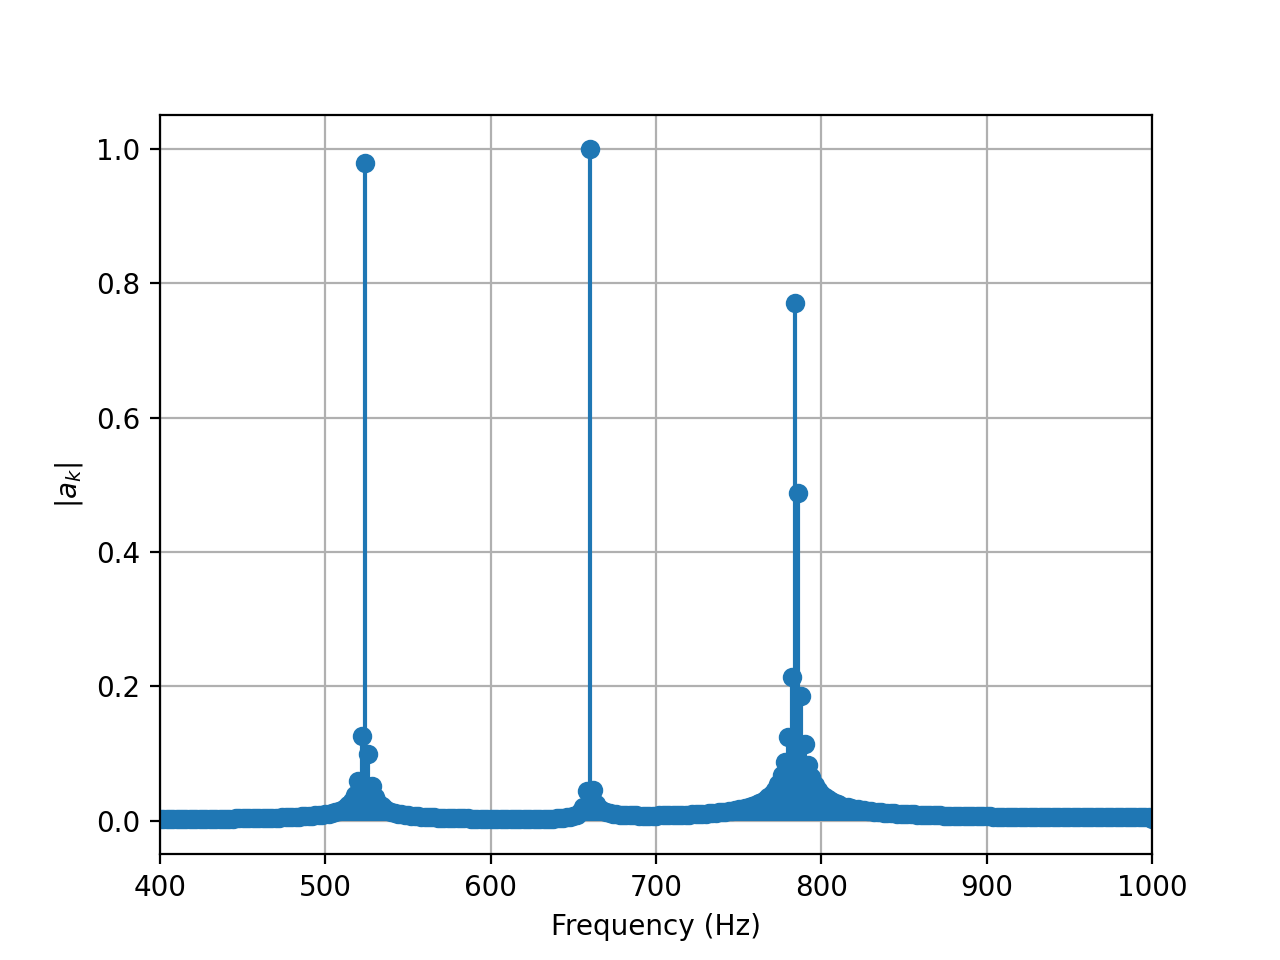

/var/folders/qd/wyqw91fj4ll04gr1jkj3cvgw0000gn/T/ipykernel_42473/4063187062.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(v, triad_amps, basefmt=" ", use_line_collection=True)


In [65]:
def p(t: np.ndarray, A: Union[int, float], f: Union[int, float]) -> np.ndarray:
    return A * np.sin(2 * np.pi * f * t)

# sampling 0.5 seconds at 2000 HZ
T = 0.5 # duration in seconds
N = T * 2000 # number of samples
t = np.arange(int(0.5 * 2000) + 1) / 2000 # the sample-locations, in seconds

cpressure = 1 * np.sin(2*np.pi*523.25*t)
epressure = 1 * np.sin(2*np.pi*659.25*t)
gpressure = 1 * np.sin(2*np.pi*783.99*t)

triad = cpressure + epressure + gpressure # sampled triad

k = np.arange(0, N//2 + 1)# k-values

v = k / T # k converted to frequencies (units: Hz)

fourier_triad = py_dft(triad) # complex-valued fourier coefficients for triad samples

triad_amps, triad_phases = fourier_complex_to_real(fourier_triad, N) # real-valued Fourier amplitudes & phases for triad samples

# plotting |ak| vs vk
# You should see three major peaks at 523.25, 659.25, & 783.99
fig, ax = plt.subplots()

ax.stem(v, triad_amps, basefmt=" ", use_line_collection=True)
ax.set_xlim(0, 0.03)
ax.set_xlim(400, 1000)
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)")
ax.grid(True)


### Optional

Note: **Do not spend more than five minutes on this**. Once you hit five minutes, skip this and move on! It is totally optional.

Returning to the Fourier spectrum for $g(t) = \sin(2 \pi f t)$

The peak-valued coefficient, $c_{k_{\text{peak}}}$, should be the only non-zero coefficient.
What is this telling us?
This says that the samples of our pure sinusoid is described by the following summation (inverse DFT) where all but two of the terms are zero:

\begin{align}
\sin(2\pi t_n) &= \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}} = 0\;+ ... + \frac{1}{N} c_{k_{\text{peak}}}e^{i 2 \pi f t_n} + 0\;+ ... +\; \frac{1}{N} c^{*}_{k_{\text{peak}}}e^{-i 2 \pi f t_n};\;\; n \in [0, 1, \dots, N-1]\\
&= \frac{1}{N}(c_{k_{\text{peak}}}e^{i 2\pi\frac{k_{\text{peak}}}{T}t_n} + c^{*}_{k_{\text{peak}}}e^{-i 2\pi\frac{k_{\text{peak}}}{T}t_n});\;\; n \in [0, 1, \dots, N-1]
\end{align}

Earlier, we rewrote $\sin(2\pi t)$ in terms of complex-valued exponentials; let's rewrite the left side of this equation – $\sin(2\pi t_n)$ — in the same way

\begin{equation}
\sin(2\pi t_n) = \frac{1}{2i}e^{i 2 \pi f t_n} + \frac{-1}{2i}e^{-i 2 \pi f t_n}
\end{equation}


Given that these two expressions are equal, we have:
\begin{equation}
\frac{1}{2i}e^{i 2 \pi f t_n} + \frac{-1}{2i}e^{-i 2 \pi f t_n} = \frac{1}{N}(c_{k_{\text{peak}}}e^{i 2\pi\frac{k_{\text{peak}}}{T}t_n} + c^{*}_{k_{\text{peak}}}e^{-i 2\pi\frac{k_{\text{peak}}}{T}t_n});\;\; n \in [0, 1, \dots, N-1]
\end{equation}


(1.4.7) Given this expression, what should $c_{k_{\text{peak}}}$ be equal to for $g(t) = \sin(2 \pi f t)$? What should $k_{\text{peak}}$ be equal to? 

Verify that the values for $c_{k_{\text{peak}}}$ and $k_{\text{peak}}$ produced by your DFT match the values that you predict.

> 1.4.5 Solution: *SOLUTION HERE*

In [ ]:
# STUDENT CODE HERE